<h1 style="color:blue; text-align:center;">Data Preprocessing</h1>


<H2>Load Dataset</H2>

In [2]:
import pandas as pd
df = pd.read_csv("../Dataset/employee-attrition-prediction.csv")
df

,Unnamed: 0,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,1,30585,35,Male,7,Education,4563,Good,High,Average,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,2,54656,50,Male,7,Education,5583,Fair,High,Average,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,3,33442,58,Male,44,Media,5525,Fair,Very High,High,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,4,15667,39,Male,24,Education,4604,Good,High,Average,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,74493,37195,50,Female,12,Education,4414,Fair,High,Average,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
74494,74494,6266,18,Male,4,Healthcare,8040,Fair,High,High,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
74495,74495,54887,22,Female,14,Technology,7944,Fair,High,High,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
74496,74496,861,23,Male,8,Education,2931,Fair,Very High,Average,...,0,Entry,Large,9,No,No,No,Good,Low,Left


<h2>Initial Data Exploration</h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                74498 non-null  int64 
 1   Employee ID               74498 non-null  int64 
 2   Age                       74498 non-null  int64 
 3   Gender                    74498 non-null  object
 4   Years at Company          74498 non-null  int64 
 5   Job Role                  74498 non-null  object
 6   Monthly Income            74498 non-null  int64 
 7   Work-Life Balance         74498 non-null  object
 8   Job Satisfaction          74498 non-null  object
 9   Performance Rating        74498 non-null  object
 10  Number of Promotions      74498 non-null  int64 
 11  Overtime                  74498 non-null  object
 12  Distance from Home        74498 non-null  int64 
 13  Education Level           74498 non-null  object
 14  Marital Status        

In [4]:
df.describe


<bound method NDFrame.describe of        Unnamed: 0  Employee ID  Age  Gender  Years at Company    Job Role  \
0               0        52685   36    Male                13  Healthcare   
1               1        30585   35    Male                 7   Education   
2               2        54656   50    Male                 7   Education   
3               3        33442   58    Male                44       Media   
4               4        15667   39    Male                24   Education   
...           ...          ...  ...     ...               ...         ...   
74493       74493        37195   50  Female                12   Education   
74494       74494         6266   18    Male                 4  Healthcare   
74495       74495        54887   22  Female                14  Technology   
74496       74496          861   23    Male                 8   Education   
74497       74497        15796   56    Male                19  Technology   

       Monthly Income Work-Life Balance J

In [5]:
df.shape

(74498, 25)

In [6]:
df.columns

Index(['Unnamed: 0', 'Employee ID', 'Age', 'Gender', 'Years at Company',
       'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

<h2>Drop Unnecessary Columns</h2>

In [7]:
df.drop(['Unnamed: 0', 'Employee ID'], axis=1, inplace=True)
print(df.head())

   Age Gender  Years at Company    Job Role  Monthly Income Work-Life Balance  \
0   36   Male                13  Healthcare            8029         Excellent   
1   35   Male                 7   Education            4563              Good   
2   50   Male                 7   Education            5583              Fair   
3   58   Male                44       Media            5525              Fair   
4   39   Male                24   Education            4604              Good   

  Job Satisfaction Performance Rating  Number of Promotions Overtime  ...  \
0             High            Average                     1      Yes  ...   
1             High            Average                     1      Yes  ...   
2             High            Average                     3      Yes  ...   
3        Very High               High                     0      Yes  ...   
4             High            Average                     0      Yes  ...   

   Number of Dependents Job Level Company Size  Co

In [8]:
df.shape

(74498, 23)

<h2>Unique Values in Selected Columns</h2>

In [9]:
columns_to_check = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
                    'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
                    'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
                    'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']

print("Unique values in each column:")
for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}\n")


Unique values in each column:
Gender: ['Male' 'Female']

Job Role: ['Healthcare' 'Education' 'Media' 'Technology' 'Finance']

Work-Life Balance: ['Excellent' 'Good' 'Fair' 'Poor']

Job Satisfaction: ['High' 'Very High' 'Medium' 'Low']

Performance Rating: ['Average' 'High' 'Below Average' 'Low']

Overtime: ['Yes' 'No']

Education Level: ['Master’s Degree' 'Associate Degree' 'High School' 'Bachelor’s Degree'
 'PhD']

Marital Status: ['Married' 'Single' 'Divorced']

Job Level: ['Mid' 'Entry' 'Senior']

Company Size: ['Large' 'Medium' 'Small']

Remote Work: ['No' 'Yes']

Leadership Opportunities: ['No' 'Yes']

Innovation Opportunities: ['No' 'Yes']

Company Reputation: ['Poor' 'Good' 'Fair' 'Excellent']

Employee Recognition: ['Medium' 'High' 'Low' 'Very High']

Attrition: ['Stayed' 'Left']



<h2>Handle Missing Values</h2>

In [10]:
df.fillna({
    'Age': df['Age'].median(),
    'Years at Company': df['Years at Company'].median(),
    'Monthly Income': df['Monthly Income'].median(),
    'Number of Promotions': df['Number of Promotions'].median(),
    'Distance from Home': df['Distance from Home'].median(),
    'Number of Dependents': df['Number of Dependents'].median(),
    'Company Tenure': df['Company Tenure'].median(),

    'Gender': df['Gender'].mode()[0],
    'Job Role': df['Job Role'].mode()[0],
    'Work-Life Balance': df['Work-Life Balance'].mode()[0],
    'Job Satisfaction': df['Job Satisfaction'].mode()[0],
    'Performance Rating': df['Performance Rating'].mode()[0],
    'Overtime': df['Overtime'].mode()[0],
    'Education Level': df['Education Level'].mode()[0],
    'Marital Status': df['Marital Status'].mode()[0],
    'Job Level': df['Job Level'].mode()[0],
    'Company Size': df['Company Size'].mode()[0],
    'Remote Work': df['Remote Work'].mode()[0],
    'Leadership Opportunities': df['Leadership Opportunities'].mode()[0],
    'Innovation Opportunities': df['Innovation Opportunities'].mode()[0],
    'Company Reputation': df['Company Reputation'].mode()[0],
    'Employee Recognition': df['Employee Recognition'].mode()[0],
    'Attrition': df['Attrition'].mode()[0]
}, inplace=True)


In [11]:
df.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

<h2>Handle Duplicate Rows</h2>

In [12]:
duplicate_row = df[df.duplicated()]
print(duplicate_row)

Empty DataFrame
Columns: [Age, Gender, Years at Company, Job Role, Monthly Income, Work-Life Balance, Job Satisfaction, Performance Rating, Number of Promotions, Overtime, Distance from Home, Education Level, Marital Status, Number of Dependents, Job Level, Company Size, Company Tenure, Remote Work, Leadership Opportunities, Innovation Opportunities, Company Reputation, Employee Recognition, Attrition]
Index: []

[0 rows x 23 columns]


In [13]:
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df_no_duplicates = df.drop_duplicates()
row_count_no_duplicates = len(df_no_duplicates)
print("Count of rows after removing duplicate rows: ", row_count_no_duplicates)

Count of rows after removing duplicate rows:  74498


<h2>Normalize Numerical Columns</h2>

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
numerical_cols = ['Age', 'Monthly Income', 'Years at Company', 'Distance from Home', 'Number of Promotions', 'Number of Dependents', 'Company Tenure']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,0.439024,Male,0.24,Healthcare,0.455873,Excellent,High,Average,0.25,Yes,...,0.166667,Mid,Large,0.158730,No,No,No,Poor,Medium,Stayed
1,0.414634,Male,0.12,Education,0.223615,Good,High,Average,0.25,Yes,...,0.666667,Entry,Medium,0.198413,No,No,No,Good,High,Left
2,0.780488,Male,0.12,Education,0.291965,Fair,High,Average,0.75,Yes,...,0.333333,Senior,Medium,0.587302,No,No,Yes,Good,Low,Stayed
3,0.975610,Male,0.86,Media,0.288079,Fair,Very High,High,0.00,Yes,...,0.666667,Entry,Medium,0.746032,No,No,No,Poor,Low,Left
4,0.512195,Male,0.46,Education,0.226362,Good,High,Average,0.00,Yes,...,1.000000,Mid,Large,0.341270,Yes,No,No,Good,High,Stayed


## Label Encoding

### Convert Categorical Columns to Numerical Values

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder = LabelEncoder()

In [20]:
categorical_cols = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

        Age  Gender  Years at Company  Job Role  Monthly Income  \
0  0.439024       1              0.24         2        0.455873   
1  0.414634       1              0.12         0        0.223615   
2  0.780488       1              0.12         0        0.291965   
3  0.975610       1              0.86         3        0.288079   
4  0.512195       1              0.46         0        0.226362   

   Work-Life Balance  Job Satisfaction  Performance Rating  \
0                  0                 0                   0   
1                  2                 0                   0   
2                  1                 0                   0   
3                  1                 3                   2   
4                  2                 0                   0   

   Number of Promotions  Overtime  ...  Number of Dependents  Job Level  \
0                  0.25         1  ...              0.166667          1   
1                  0.25         1  ...              0.666667          0   

In [21]:
df.shape

(74498, 23)

## Outlier Handling Using IQR Method

In [22]:
numerical_cols = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [23]:
df.shape

(73915, 23)

<h2>Save the Preprocessed Dataset</h2>

In [24]:
df.to_csv("../Dataset/after_preprocessing.csv", index=False)

<h2>Feature Engineering</h2>

In [25]:
df['Experience'] = df['Years at Company'] + df['Company Tenure']
df['High Income'] = df['Monthly Income'].apply(lambda x: 1 if x > 0.5 else 0)
df['Promotion_Frequency'] = df['Number of Promotions'] / (df['Years at Company'] + 1)

df.drop(['Company Tenure', 'Years at Company', 'Monthly Income'], axis=1, inplace=True)
df.shape

(73915, 23)

<h2>Save the Feature Engineering Dataset</h2>

In [27]:
df.to_csv("../Dataset/after_feature_engineering.csv", index=False)

<h2>Pie Chart</h2>

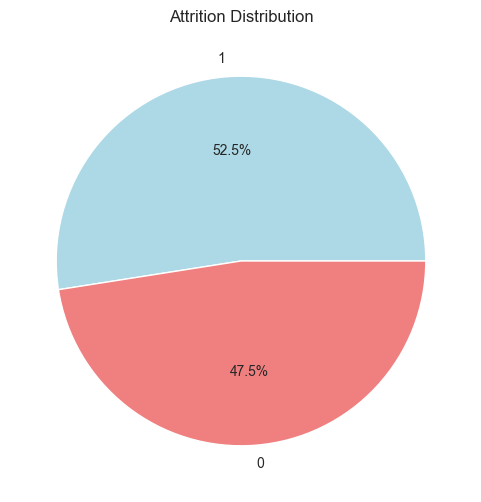

In [35]:
plt.figure(figsize=(6, 6))
df['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Attrition Distribution")
plt.ylabel("")
plt.show()

<h2>Bar Charts</h2>

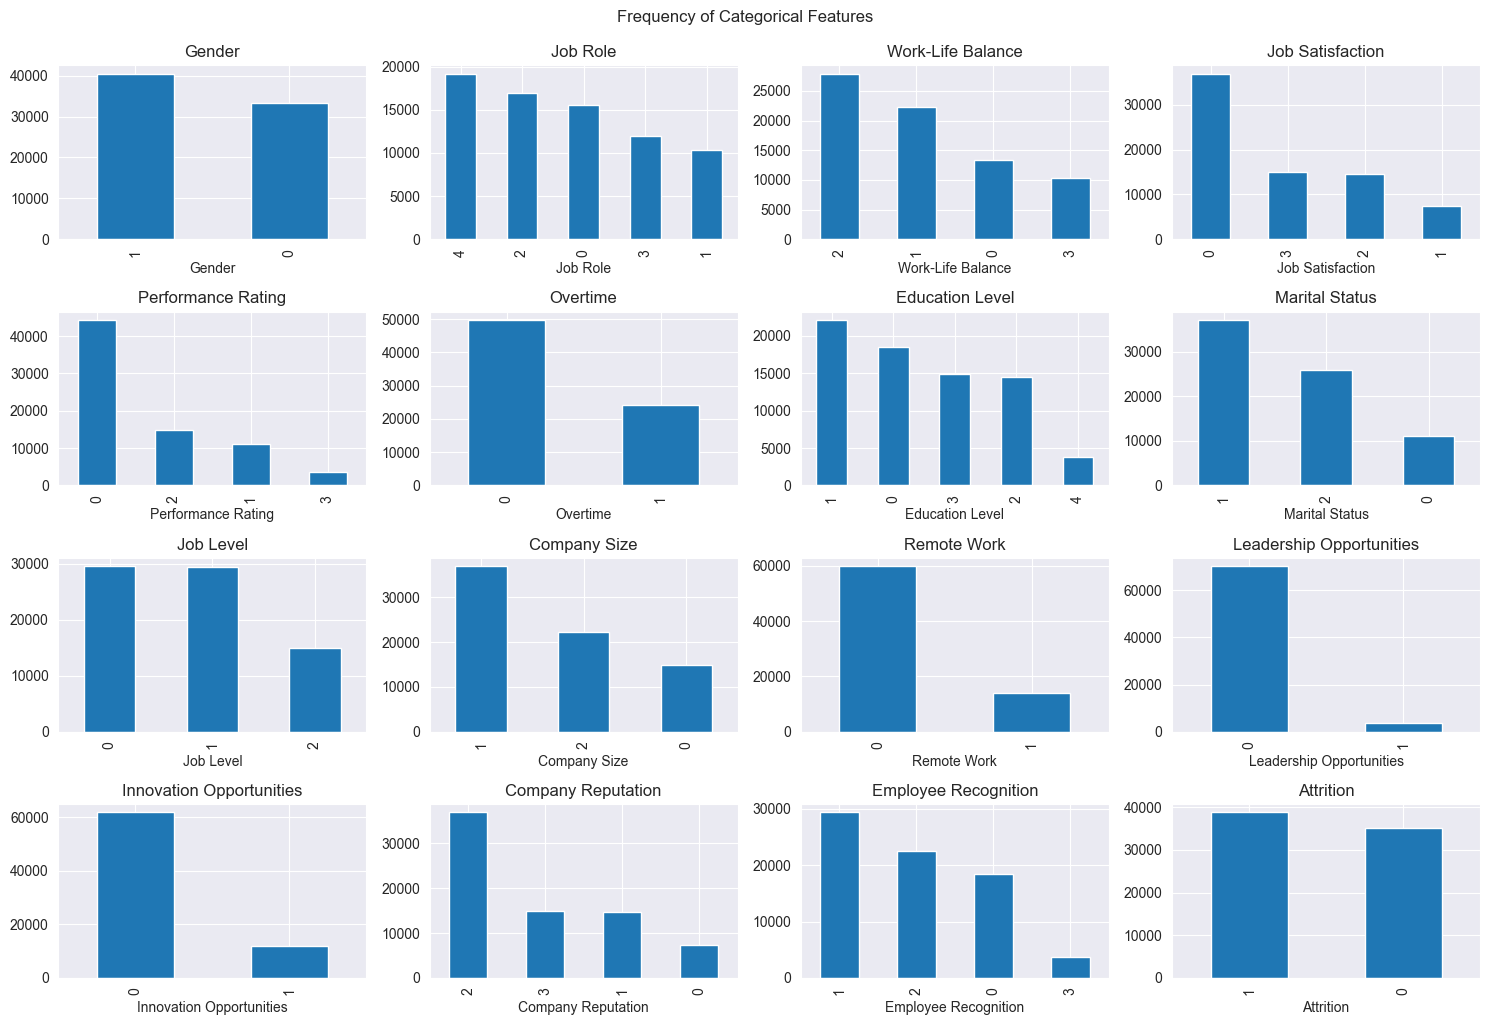

In [29]:
# Plot bar charts for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Frequency of Categorical Features", y=1.02)
plt.show()

<h2>Heatmap</h2>

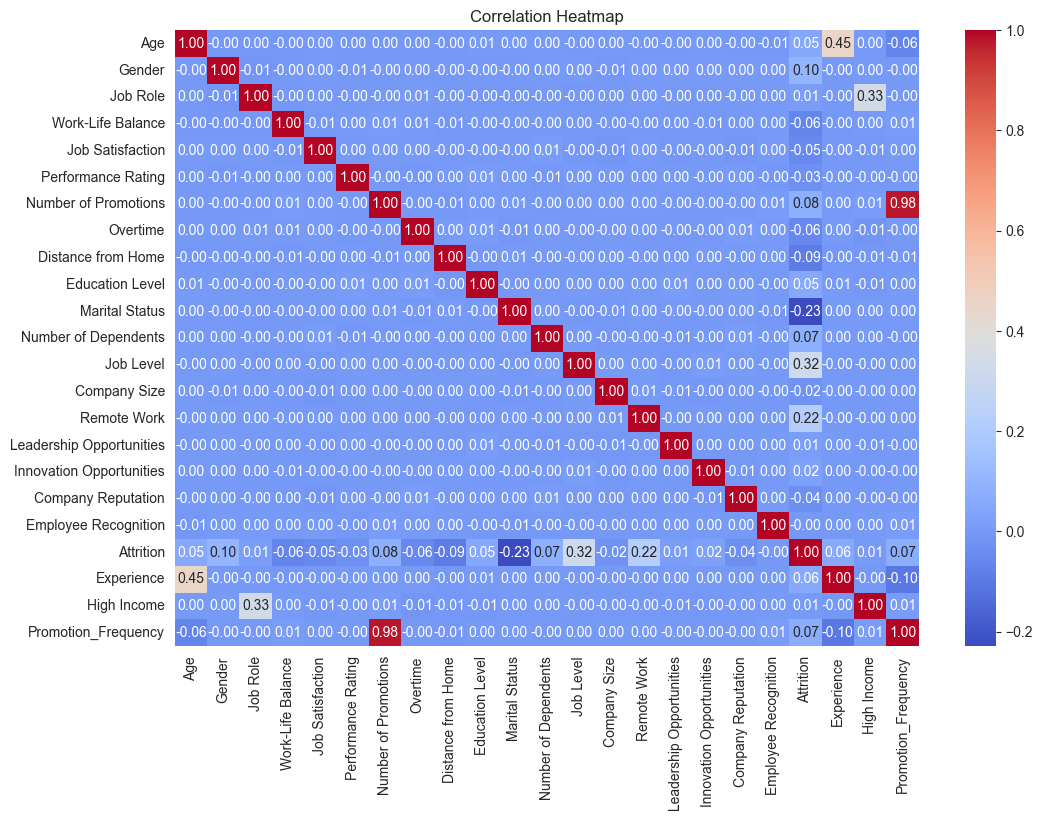

In [31]:
import seaborn as sns

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()